# Kinematics: Decribing the Motions of Spacecraft
This notebook is intended to complement the coursera course "Kinematics: Describing the Motions of Spacecraft". The notes in here are basic and all attempts will be made to add in the relvant sources, tips and notes that will enable an easier learning/understanmding if possible.

In [1]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, FloatSlider 
from itertools import product, combinations
import plotly.graph_objects as go


- Numpy:
- Matplotlib
- Plotly
- Sympy
- 

## Week 1 - Introduction to Kinematics
1. An Overview of Angular Velocity
2. An overview of Particle Kinematics and vector frames
4. Kinematic Transport Theorem

### 1.1) An overview of Angular Velocity

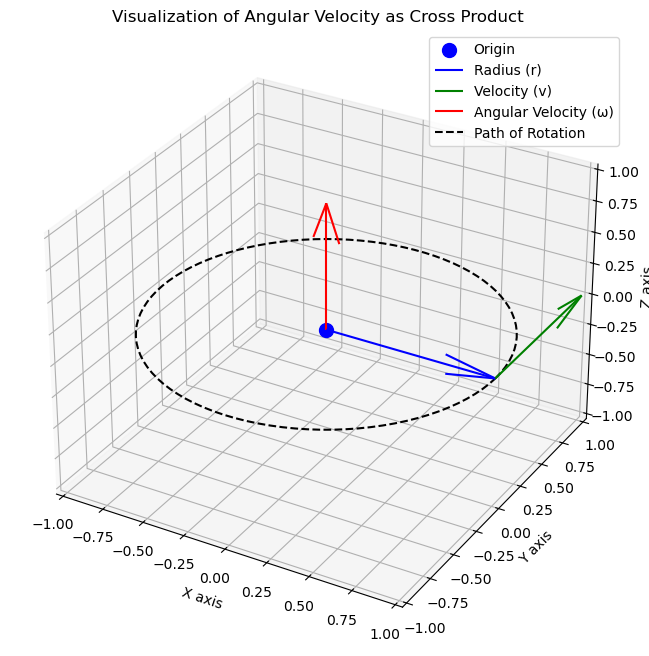

In [2]:
''' 
Visualizing angular velocity vector
'''

# Origin
origin = np.array([0,0,0])

# Define the radius vector (r) and tangential velocity vector (v) arbitrarily
r = np.array([1, 0, 0])  # Example: radius vector along the x-axis
v = np.array([0, 1, 0])  # Example: velocity vector along the y-axis

# Calculate the angular velocity vector (omega) as the cross product of r and v
omega = np.cross(r, v)

# Create a 3D plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot a single point at the origin
ax.scatter(*origin, color='blue', s=100, label='Origin')

# Plot the radius vector (r)
ax.quiver(*origin, *r, color='blue', length=1, normalize=True, label='Radius (r)')

# Plot the tangential velocity vector (v)
ax.quiver(*r, *v, color='green', length=1, normalize=True, label='Velocity (v)')

# Plot the angular velocity vector (omega)
ax.quiver(*origin, *omega, color='red', length=1, normalize=True, label='Angular Velocity (ω)')

# Plotting a dotted circular path for rotation
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = np.zeros_like(t)
# Here, we simply plot the circle in the XY-plane
ax.plot(x, y, z, '--k', label='Path of Rotation')

# Setting the plot appearance
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Visualization of Angular Velocity as Cross Product')
ax.legend()

plt.show()

<ins>Dynamics Notes<ins>:
- Note that if the origin is <0, 0, 0>, and an object is 'circling' about the origin at some distance away as represented by Radius Vector, r, the angular velocity vector is the cross product of the r with tangential velocity vector, v

- This is true for any arbitrary vector oriented in arbitrarily in space.

- The absolute of the cross product is the magnitude of angular velcoity, and the direction is orthornormal to both r and v.

- The angular velocity vector shows the direction, or rather, the axis about which the object is rotating (akin to a skewer) and is best represented at the point around which an object is circling/orbitng


### 1.1) An overview of Particle Kinematics and Vector Frames

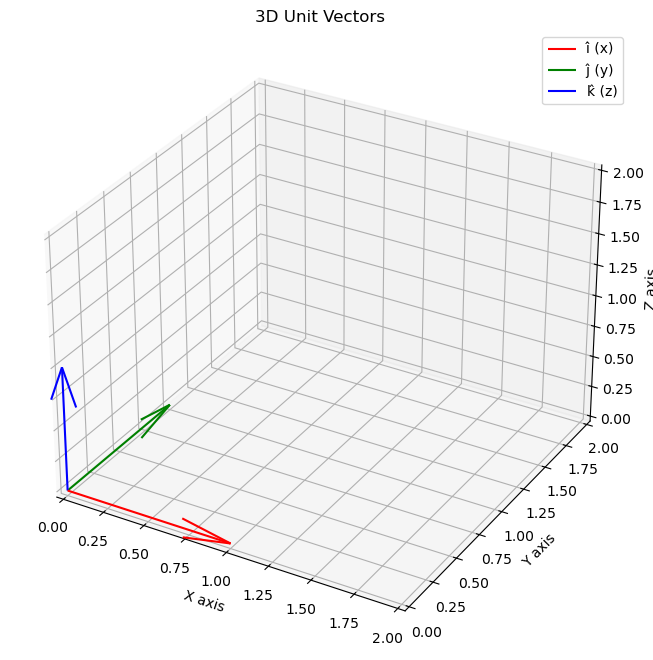

In [3]:
''' 
Visualizing the basic unit vector triad
'''

# Origin for Triad of Unit Vectors
origin = np.array([0,0,0])

# Unit Vectors for the triad
i_hat = np.array([1,0,0])
j_hat = np.array([0,1,0])
k_hat = np.array([0,0,1])

# Directly create a 3D plot
fig = plt.figure(figsize=(8,16))                          # creates a new canvas upon which figure is drawn/plotted
ax = fig.add_subplot(111, projection='3d')  # Directly specifying the 3D projection

# Plot the unit vectors
ax.quiver(*origin, *i_hat, length=1, color='r', label='î (x)')
ax.quiver(*origin, *j_hat, length=1, color='g', label='ĵ (y)')
ax.quiver(*origin, *k_hat, length=1, color='b', label='k̂ (z)')

# Setting plot limits and labels
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Unit Vectors')
ax.legend()

plt.show()

In [4]:
''' 
Visualizing Rotating Frames
'''

def update_plotly_frame(theta_x_deg=0, theta_y_deg=0, theta_z_deg=0):
    # Convert degrees to radians for rotation
    theta_x = np.radians(theta_x_deg)
    theta_y = np.radians(theta_y_deg)
    theta_z = np.radians(theta_z_deg)
    
    # Define rotation matrices for each axis based on the input angles. These matrices rotate points/vectors in 3D space around the axes
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(theta_x), -np.sin(theta_x)],
                    [0, np.sin(theta_x), np.cos(theta_x)]])
                    
    R_y = np.array([[np.cos(theta_y), 0, np.sin(theta_y)],
                    [0, 1, 0],
                    [-np.sin(theta_y), 0, np.cos(theta_y)]])
                    
    R_z = np.array([[np.cos(theta_z), -np.sin(theta_z), 0],
                    [np.sin(theta_z), np.cos(theta_z), 0],
                    [0, 0, 1]])

    # Combine rotation matrices to get a single rotation matrix (R) in sequence (Z, Y, X order) / (3, 2, 1 order)
    R = np.matmul(R_z, np.matmul(R_y, R_x))

    # Apply the combined rotation (R) to the standard basis vectors (N-frame) to get the rotated basis vectors for the E-frame
    N_i, N_j, N_k = np.eye(3)                                                              # Standard basis vectors of N-frame
    E_i, E_j, E_k = np.matmul(R, N_i), np.matmul(R, N_j), np.matmul(R, N_k)                # Rotated base vectors for E-frame
    
    # Initialize the figure and plot both the N-frame and E-frame vectors using Scatter3d plots for lines and markers
    fig = go.Figure(data=[
        # Plotting N-frame vectors
        go.Scatter3d(x=[0, N_i[0]], y=[0, N_i[1]], z=[0, N_i[2]], mode='lines+markers', name='N_i', marker=dict(color='red')),
        go.Scatter3d(x=[0, N_j[0]], y=[0, N_j[1]], z=[0, N_j[2]], mode='lines+markers', name='N_j', marker=dict(color='green')),
        go.Scatter3d(x=[0, N_k[0]], y=[0, N_k[1]], z=[0, N_k[2]], mode='lines+markers', name='N_k', marker=dict(color='blue')),
        # Plotting E-frame vectors
        go.Scatter3d(x=[0, E_i[0]], y=[0, E_i[1]], z=[0, E_i[2]], mode='lines+markers', name='E_i', marker=dict(color='yellow')),
        go.Scatter3d(x=[0, E_j[0]], y=[0, E_j[1]], z=[0, E_j[2]], mode='lines+markers', name='E_j', marker=dict(color='cyan')),
        go.Scatter3d(x=[0, E_k[0]], y=[0, E_k[1]], z=[0, E_k[2]], mode='lines+markers', name='E_k', marker=dict(color='magenta'))])
    
    # Apply dark theme for better visual appearance and adjust figure size
    fig.update_layout(width=1000, 
                      height=800, 
                      template="plotly_dark", 
                      scene=dict(aspectmode='cube'),
                      title='Interactive N-frame and E-frame Rotation Visualization')
    
    fig.show()

# Create interactive sliders for adjusting rotation angles in degrees
interact(update_plotly_frame,
         theta_x_deg=FloatSlider(min=-180, max=180, step=1, value=0, description='Theta X (deg)'),
         theta_y_deg=FloatSlider(min=-180, max=180, step=1, value=0, description='Theta Y (deg)'),
         theta_z_deg=FloatSlider(min=-180, max=180, step=1, value=0, description='Theta Z (deg)', continuous_update=True))

interactive(children=(FloatSlider(value=0.0, description='Theta X (deg)', max=180.0, min=-180.0, step=1.0), Fl…

<function __main__.update_plotly_frame(theta_x_deg=0, theta_y_deg=0, theta_z_deg=0)>

<ins>Dynamics Notes<ins>:

- Note that wherever the frames are spatially, it is appropriate to 'translate' them to the reference frame just to see how it is oriented with respect to reference
- Every frame, by convention is right handed. Align your right hand along the i-direction, curl your fingers toward j-vector to obtain the direction of k-vector
- Positive angular direction is typically defined in the counter-clockwise direction when 'looking' down along the axis of rotation

**Python Coding Notes**:
- The asterisk (*) operator, when used in front of a variable like *origin in a function call, performs argument unpacking. This means it takes a sequence (like a list, tuple, or array) and expands it into individual positional arguments in the function call.

- When you call plt.figure(), you're essentially creating a new blank canvas on which plots can be drawn.

- The axes (ax) represent an individual plot or graph. While "figure" is the canvas, "axes" can be thought of as the frame within which you draw your plot. You can have multiple frames (axes) within one canvas (figure).

- add_subplot is a method used to add an axes to the figure. It can be used to create a subplot within the figure. Even if you're only creating one plot, you're technically adding a single subplot to the figure. The projection='3d' argument is crucial for 3D plots. It tells Matplotlib that this particular axes (or subplot) is going to be used for 3D plotting. Without this, Matplotlib would prepare the axes for a 2D plot by default.

- The add_subplot method is used to add a subplot to the current figure. It has a few different ways it can be called, but one common way is using a three-digit integer as its argument; The first digit represents the number of rows of subplots in the figure, The second digit represents the number of columns of subplots, The third digit represents the index of the current subplot (which subplot it is, counting from left to right and then top to bottom). add_subplot(111) means you want a grid of 1 row by 1 column, and you're adding the first subplot.
      

- The plot limits quite literally limits the view from a range of 0 to 1. Plot Labels are Self-explanatory

- For more about quiver plot: https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/

### 1.3) Kinematic Transport Theorem

The **Kinematic Transport Theorem** provides a crucial relationship in dynamics, particularly for understanding how a vector's time derivative in one frame relates to its time derivative in another frame, through the influence of angular velocity. This theorem is foundational for analyzing the motion of bodies in rotating reference frames, such as in aerospace dynamics and robotics.

#### I. Theorem Statement
Given a vector $\mathbf{V}$ observed from two different reference frames:
- An inertial frame, denoted as $N$
- A rotating frame, denoted as $E$, with an angular velocity $\boldsymbol{\omega}$ relative to $N$

The time derivative of $\mathbf{V}$ in the inertial frame $N$ is equal to the time derivative in the rotating frame $E$, plus the cross product of the angular velocity $\boldsymbol{\omega}$ of frame $E$ relative to $N$ and the vector $\mathbf{V}$ itself:

$$ ^N\dot{\mathbf{V}} = ^E\dot{\mathbf{V}} + \boldsymbol{\omega} \times \mathbf{V} $$

#### II. Components of the Theorem
- $^N\dot{\mathbf{V}}$: The time derivative of $\mathbf{V}$ with respect to the inertial frame $N$.
- $^E\dot{\mathbf{V}}$: The time derivative of $\mathbf{V}$ with respect to the rotating frame $E$.
- $\boldsymbol{\omega}$: The angular velocity vector of the rotating frame $E$ relative to the inertial frame $N$.
- $\mathbf{V}$: The vector of interest, which could represent any physical quantity, such as position or velocity.
- $\times$: Denotes the cross product operation.

#### III. Significance
This theorem is essential for:
- Transforming physical quantities between different reference frames.
- Understanding the effects of rotation on vector quantities.
- Designing and analyzing systems in aerospace engineering, robotics, and other fields involving rotational dynamics.

## Week 2 - Rigid Body Kinematics I
1. Rigid Body Kinematics
2. Directional Cosine Matrices (DCMs)
3. Euler Angles

### 2.1) Rigid Body Kinematics Overview

- Spatial coordinates refer to the position of a point in space relative to an inertial frame; attidue coordinates denote the orientation of the object or a seocndary frame of reference relative to an inertial frame. Attitude Coordinates describe where an object is pointing towards
- 

### 2.2) Directional Cosine Matrices (DCMs)

### 2.3) Euler Angles

## Week 3 - Rigid Body Kinematics II
1. Principal Rotation Vectors (PRVs)
2. Quaternions / Euler Parameters
3. Classical Rodrigues Parameters (CRPs)
4. Modified Rodrigues Parameters (MRPs)
5. Stereographic Orientation Paramters

## Week 4 - Static Attitude Determination
1. Attitude Determination Overview
2. Methods for Attitude Determination
3. Kinematics Final Assignment